**DS 301: Applied Data Modeling and Predictive Analysis**

# Lab 10 – DNN-Classifier

Nok Wongpiromsarn, 13 November 2020

**Instructions:**
1. Load the Dogs & Cats Images dataset from https://www.kaggle.com/chetankv/dogs-cats-images (Links to an external site.). Use tf.keras.preprocessing.image.ImageDataGenerator to generate batches of tensor image data from RGB images.
2. Build an image classifier using a sequential model with the following layers:
   - a flatten layer to convert each input image into a 1D array
   - a hidden dense layer with 300 neurons, ELU activation function, and He initialization
   - a hidden dense layer with 100 neurons, ELU activation function, and He initialization
   - a dense output layer
3. Train the model for 5 epochs.
4. Visualize some images along with their predictions. What do you observe from the predictions?
5. Plot the learning curve (the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch).
6. Build the second model by applying Batch Normalization after every hidden layer and as the first layer in the model (after flattening the input images). Train the model for 5 epochs and plot the learning curve.
7. Build a CNN model with the following layers.  Train the model for 5 epochs and plot the learning curve.
   - a convolutional layer with 32 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a convolutional layer with 64 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a convolutional layer with 128 3x3 filters and ReLU activation function
   - a max pooling layer with a pool size of 2
   - a flatten layer
   - a dense layer with 64 neurons and ELU activation function
   - a dense layer with 32 neurons and ELU activation function
   - a dense output layer
8. Build the second CNN model by adding Dropout with dropout rate of 20% after every max pooling layer and hidden dense layer. Train the model for 5 epochs and plot the learning curve.
9. Discuss the differences between the 4 models in terms of their performance and the number of parameters.

### 1. Load the Dogs & Cats Images dataset from https://www.kaggle.com/chetankv/dogs-cats-images

In [1]:
import os
from tensorflow import keras

data_path = os.path.join("datasets", "dogs_cats")
train_path = os.path.join(data_path, "training_set")
test_path = os.path.join(data_path, "test_set")

# Use ImageDataGenerator to prepare the dataset
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

batch_size = 32
image_size = 64
data_train = data_generator.flow_from_directory(
    directory = train_path,
    target_size = (image_size,image_size),
    batch_size = batch_size,
    class_mode = 'binary'
)
print(data_train.image_shape)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
(64, 64, 3)


In [2]:
# The following code fixes the failure 
# "Failed to get convolution algorithm. This is probably because cuDNN failed to initialize".
# See https://github.com/tensorflow/tensorflow/issues/24828#issuecomment-682145510.
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Another way is to disable CUDA
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

### 2. Build an image classifier using a sequential model with the following layers:

- a flatten layer to convert each input image into a 1D array
- a hidden dense layer with 300 neurons, ELU activation function, and He initialization
- a hidden dense layer with 100 neurons, ELU activation function, and He initialization
- a dense output layer

In [3]:


# Displays all the model’s layers
model_dnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               3686700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 3,717,002
Trainable params: 3,717,002
Non-trainable params: 0
_________________________________________________________________


### 3. Train the model for 5 epochs

In [4]:
model_dnn1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history_dnn1 = model_dnn1.fit(
    data_train, epochs=5, validation_data=data_test
)

Epoch 1/5
250/250 [==============================] - 19s 76ms/step - loss: 0.7116 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
250/250 [==============================] - 15s 61ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
250/250 [==============================] - 15s 60ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
250/250 [==============================] - 15s 60ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
250/250 [==============================] - 15s 61ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


### 4. Visualize some images along with their predictions.

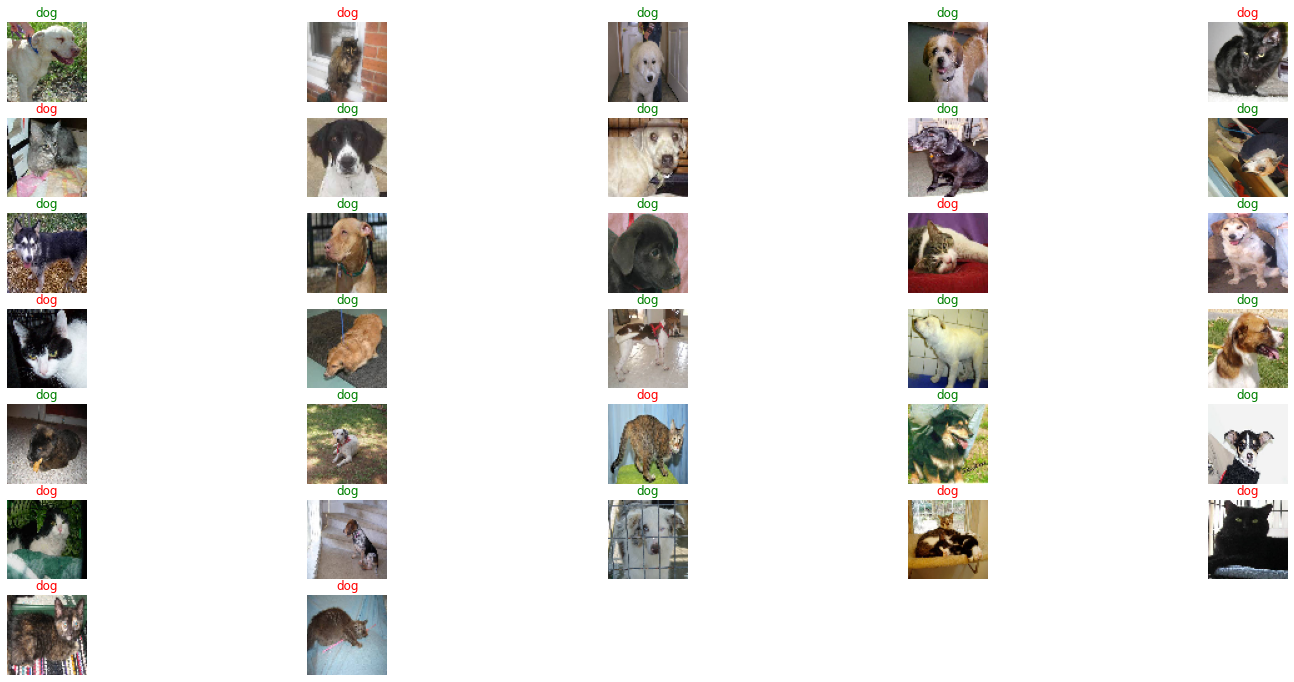

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# data_test[0] is the first batch of the test set.
# Recall that the data is processed in batch, each containing 32 images.
# data_test[0][0] has the shape of (32, 64, 64, 3) which is the 32 images of the first batch,
# each of size (64, 64) and RGB colors.

class_names = ['cat','dog']
predictions = [np.argmax(i) for i in model_dnn1.predict(data_test[0][0])]

num_cols = 5
num_rows = math.ceil(batch_size / num_cols)

plt.figure(figsize=(26, 12))
for i in range(batch_size):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(data_test[0][0][i])
    if(predictions[i] == int(data_test[0][1][i])):
        plt.title(class_names[predictions[i]],color='g')
    else:
        plt.title(class_names[predictions[i]],color='r')
    plt.axis('off')
plt.show()

### 5. Plot the learning curve

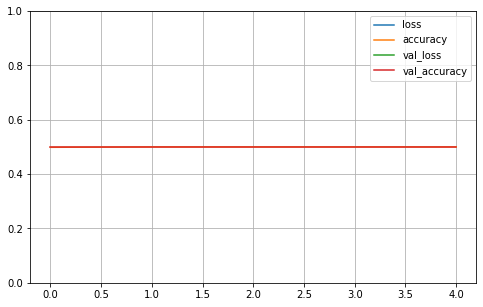

In [6]:
import pandas as pd

pd.DataFrame(history_dnn1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### 6. Build the second model by applying Batch Normalization after every hidden layer and as the first layer in the model (after flattening the input images). Train the model for 5 epochs and plot the learning curve.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12288)             49152     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               3686700   
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

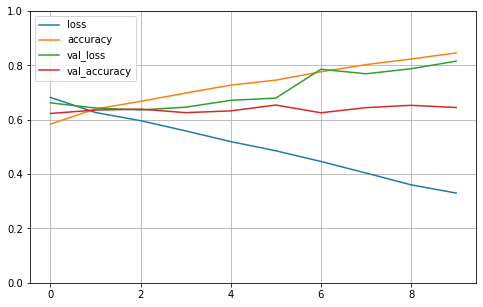

In [7]:
model_dnn2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=data_train.image_shape),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation="sigmoid"),
])

model_dnn2.summary()

model_dnn2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history_dnn2 = model_dnn2.fit(
    data_train, epochs=10, validation_data=data_test
)

pd.DataFrame(history_dnn2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### 7.  Build a CNN model with the following layers.  Train the model for 5 epochs and plot the learning curve.

- a convolutional layer with 32 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a convolutional layer with 64 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a convolutional layer with 128 3x3 filters and ReLU activation function
- a max pooling layer with a pool size of 2
- a flatten layer
- a dense layer with 64 neurons and ELU activation function
- a dense layer with 32 neurons and ELU activation function
- a dense output layer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

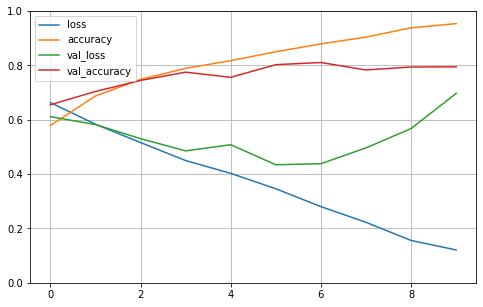

In [8]:
model_cnn1 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = data_train.image_shape),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(2, activation="softmax"),
])

# Displays all the model’s layers
model_cnn1.summary()

model_cnn1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history_cnn1 = model_cnn1.fit(
    data_train, epochs=10, validation_data=data_test
)

pd.DataFrame(history_cnn1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### 8. Build the second CNN model by adding Dropout with dropout rate of 20% after every max pooling layer and hidden dense layer. Train the model for 5 epochs and plot the learning curve.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

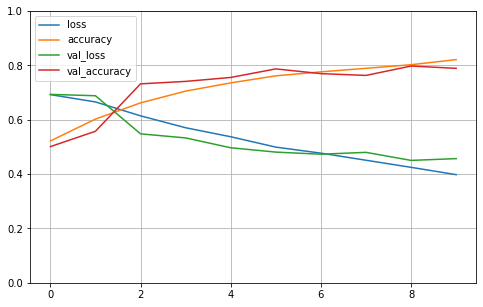

In [9]:
model_cnn2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = data_train.image_shape),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(2, activation="softmax"),
])

# Displays all the model’s layers
model_cnn2.summary()

model_cnn2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
history_cnn2 = model_cnn2.fit(
    data_train, epochs=10, validation_data=data_test
)

pd.DataFrame(history_cnn2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()